<a href="https://colab.research.google.com/github/mehak132002/face_mask_detection/blob/main/facemaskdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
# configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

# DATASET

In [3]:
!kaggle competitions download -c facemaskdetection-weightage

 97% 249M/257M [00:02<00:00, 101MB/s] 
100% 257M/257M [00:02<00:00, 91.4MB/s]


In [4]:
!ls

facemaskdetection-weightage.zip  kaggle.json  sample_data


In [5]:
#unzipping the files
from zipfile import ZipFile

dataset = '/content/facemaskdetection-weightage.zip'

with ZipFile('facemaskdetection-weightage.zip', 'r') as zip:
    zip.extractall()
    print('dataset is extracted')

dataset is extracted


In [6]:
from zipfile import ZipFile

dataset = '/content/Kaggle_test_dataset'

with ZipFile('/content/facemaskdetection-weightage.zip', 'r') as zip:
    zip.extractall()
    print('dataset Kaggle_test_dataset is extracted')

dataset Kaggle_test_dataset is extracted


In [7]:
import os
path,dirs,files = next(os.walk('/content/Kaggle_test_dataset/Kaggle_test_dataset'))
file_count = len(files)
print('number of images ' , file_count)

number of images  660


# PRINTING NAME OF IMAGES

In [8]:
file_name = os.listdir('/content/Kaggle_test_dataset/Kaggle_test_dataset')
print(file_name)

['562.png', '510.png', '516.png', '432.jpg', '488.png', '4.png', '81.png', '412.png', '103.jpg', '530.jpg', '415.png', '196.png', '181.jpg', '475.jpg', '528.png', '315.png', '390.jpg', '149.png', '380.jpg', '584.png', '549.png', '446.png', '156.png', '649.jpg', '263.png', '102.png', '284.jpg', '332.png', '292.jpg', '448.jpg', '11.jpg', '642.jpg', '147.png', '509.jpg', '372.jpg', '190.png', '150.png', '33.png', '538.png', '450.png', '127.jpg', '546.png', '131.png', '479.png', '194.jpg', '423.png', '417.png', '480.png', '620.png', '68.png', '238.png', '360.jpg', '128.png', '614.png', '112.png', '419.png', '576.jpg', '266.png', '438.jpg', '581.jpg', '218.png', '91.png', '658.png', '606.png', '374.png', '452.jpg', '659.jpg', '309.png', '319.jpg', '253.png', '129.jpg', '375.png', '256.jpg', '363.png', '504.jpg', '346.png', '199.jpg', '406.jpg', '58.png', '48.png', '610.jpg', '285.jpg', '520.jpg', '436.png', '293.png', '609.png', '159.png', '265.jpg', '596.jpg', '259.png', '79.png', '76.png'

# IMPORTING LIBRARIES

In [9]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
#display images
from google.colab.patches import cv2_imshow

# DISPLAYING IMAGES

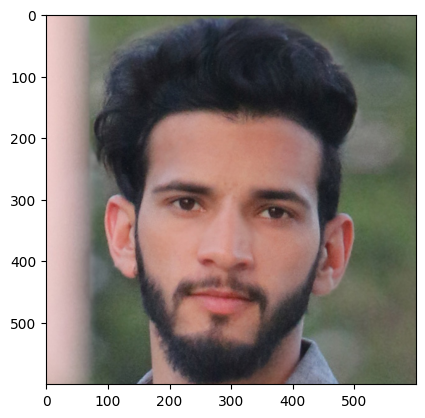

In [10]:
#without mask image
img = mpimg.imread('/content/Kaggle_test_dataset/Kaggle_test_dataset/562.png')
imgplt = plt.imshow(img)

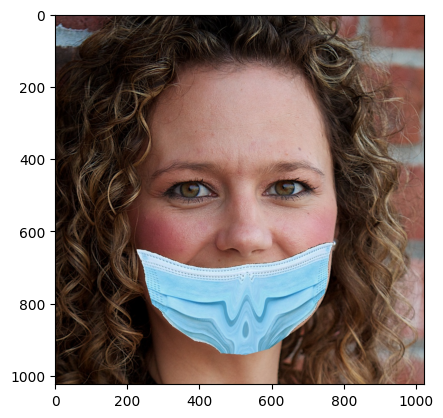

In [11]:
#with mask image
img = mpimg.imread('/content/Kaggle_test_dataset/Kaggle_test_dataset/265.jpg')
imgplt = plt.imshow(img)

In [12]:
#finding total with and without mask images
file_name = os.listdir('/content/Kaggle_test_dataset/Kaggle_test_dataset')
with_count = 0
without_count = 0

for img_file in file_name:
     name = img_file[4:]
     if name == 'jpg':
       with_count += 1
     else:
       without_count += 1

print('number of with_count images ' , with_count)
print('number of without_count images ' , without_count)

number of with_count images  183
number of without_count images  477


# RESIZING ALL IMAGES

In [13]:
#creating a copy of all resized images and reducing no. of images
os.mkdir(path = '/content/Kaggle_test_dataset/image resized')

In [52]:
original_folder = '/content/Kaggle_test_dataset/Kaggle_test_dataset/'
resized_folder = '/content/Kaggle_test_dataset/image resized/'

for i in range(660):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((128, 128))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

In [53]:
file_name = os.listdir('/content/Kaggle_test_dataset/image resized')
print(file_name)

['562.png', '510.png', '516.png', '432.jpg', '488.png', '4.png', '81.png', '412.png', '103.jpg', '530.jpg', '415.png', '196.png', '181.jpg', '475.jpg', '528.png', '315.png', '390.jpg', '149.png', '380.jpg', '584.png', '549.png', '446.png', '156.png', '649.jpg', '263.png', '102.png', '284.jpg', '332.png', '292.jpg', '448.jpg', '11.jpg', '642.jpg', '147.png', '509.jpg', '372.jpg', '190.png', '150.png', '33.png', '538.png', '450.png', '127.jpg', '546.png', '131.png', '479.png', '194.jpg', '423.png', '417.png', '480.png', '620.png', '68.png', '238.png', '360.jpg', '128.png', '614.png', '112.png', '419.png', '576.jpg', '266.png', '438.jpg', '581.jpg', '218.png', '91.png', '658.png', '606.png', '374.png', '452.jpg', '659.jpg', '309.png', '319.jpg', '253.png', '129.jpg', '375.png', '256.jpg', '363.png', '504.jpg', '346.png', '199.jpg', '406.jpg', '58.png', '48.png', '610.jpg', '285.jpg', '520.jpg', '436.png', '293.png', '609.png', '159.png', '265.jpg', '596.jpg', '259.png', '79.png', '76.png'

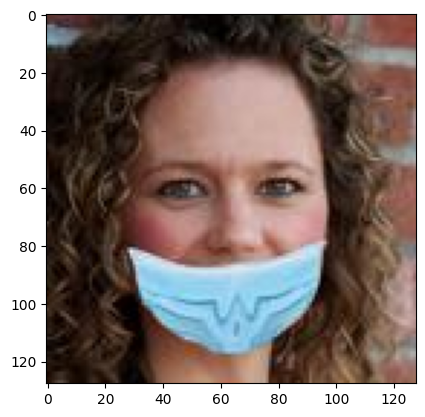

In [54]:
#with image resized
img = mpimg.imread('/content/Kaggle_test_dataset/image resized/265.jpg')
imgplt = plt.imshow(img)
plt.show()

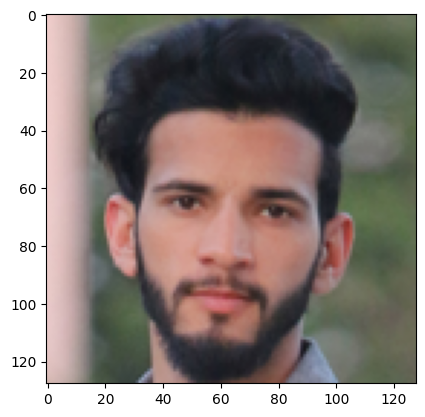

In [55]:
#with image resized
img = mpimg.imread('/content/Kaggle_test_dataset/image resized/562.png')
imgplt = plt.imshow(img)
plt.show()

In [56]:
# label without as 0 and with as 1
#creating a for loop for assigning labels
filenames = os.listdir('/content/Kaggle_test_dataset/image resized/')


labels = []

for i in range(660):

  file_name = filenames[i]
  label = file_name[-3:]

  if label == 'jpg':
    labels.append(1)

  else:
    labels.append(0)

In [57]:
print(file_name[0:5])
print(len(file_name))

148.p
7


In [58]:
print(labels[0:10])
print(len(labels))

[0, 0, 0, 1, 0, 0, 0, 0, 1, 1]
660


In [59]:
# images of with and without
values,count = np.unique(labels, return_counts=True)
print(values)
print(count)

[0 1]
[440 220]


# CONVERTING ALL RESIZED IMAGES TO NUMPY ARRAY

In [60]:
import cv2
import glob

In [61]:
image_directory = '/content/Kaggle_test_dataset/image resized/'
image_extension = ['png', 'jpg']

files = []

#to check extension of file
[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

#read file and convert it into array
with_without_images = np.asarray([cv2.imread(file) for file in files])

In [62]:
print(with_without_images)

[[[[203 205 240]
   [201 203 238]
   [199 201 235]
   ...
   [ 99 121 109]
   [ 92 115 104]
   [ 92 116 104]]

  [[203 205 240]
   [201 203 238]
   [200 202 236]
   ...
   [ 93 117 105]
   [ 92 116 104]
   [ 92 116 104]]

  [[203 205 239]
   [201 203 237]
   [199 201 235]
   ...
   [ 92 117 104]
   [ 92 117 104]
   [ 93 116 104]]

  ...

  [[184 188 217]
   [184 188 217]
   [183 187 216]
   ...
   [ 84 100  98]
   [ 86 103 102]
   [ 85  99 100]]

  [[180 185 214]
   [180 185 214]
   [181 185 214]
   ...
   [ 81  99  96]
   [ 84 100  99]
   [ 87 101 101]]

  [[177 184 211]
   [178 185 212]
   [177 183 210]
   ...
   [ 84 102  98]
   [ 83  98  97]
   [ 86  99  99]]]


 [[[252 252 252]
   [253 253 253]
   [253 253 253]
   ...
   [253 253 253]
   [253 253 253]
   [253 253 253]]

  [[253 253 253]
   [253 253 253]
   [253 253 253]
   ...
   [253 253 253]
   [253 253 253]
   [253 253 253]]

  [[253 253 253]
   [253 253 253]
   [253 253 253]
   ...
   [253 253 253]
   [253 253 253]
   [253 253

In [63]:
type(with_without_images)

numpy.ndarray

In [64]:
print(with_without_images.shape) # 3 represents rgb  ,224 pixels

(660, 128, 128, 3)


In [83]:
X = with_without_images
y = np.asarray(labels)

# TRAIN TEST SPLIT

In [84]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2,random_state = 2)

In [85]:
print(X.shape , X_train.shape , X_test.shape )

(660, 128, 128, 3) (528, 128, 128, 3) (132, 128, 128, 3)


# SCALING DATA

In [86]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [87]:
print(X_train_scaled)

[[[[0.32156863 0.4627451  0.48627451]
   [0.37254902 0.51372549 0.5372549 ]
   [0.45490196 0.58823529 0.61176471]
   ...
   [0.54901961 0.67843137 0.7372549 ]
   [0.50980392 0.63921569 0.70196078]
   [0.56078431 0.69019608 0.75294118]]

  [[0.33333333 0.4745098  0.49803922]
   [0.39215686 0.5254902  0.54901961]
   [0.45882353 0.59215686 0.61568627]
   ...
   [0.63921569 0.76862745 0.82745098]
   [0.65098039 0.78039216 0.84313725]
   [0.70196078 0.83137255 0.89411765]]

  [[0.40392157 0.54117647 0.55686275]
   [0.45882353 0.59607843 0.61176471]
   [0.5254902  0.65098039 0.67058824]
   ...
   [0.55686275 0.6745098  0.74117647]
   [0.56862745 0.68627451 0.76078431]
   [0.57647059 0.69411765 0.76862745]]

  ...

  [[0.5372549  0.45882353 0.45490196]
   [0.53333333 0.45490196 0.45098039]
   [0.54509804 0.46666667 0.4627451 ]
   ...
   [0.20392157 0.21960784 0.2       ]
   [0.20784314 0.22352941 0.20392157]
   [0.09019608 0.10588235 0.08627451]]

  [[0.52156863 0.44313725 0.43921569]
   [0.5

## BUILDING THE CONVOLUTIONAL NEURAL NETWORK MODEL

In [88]:
import tensorflow as tf
from tensorflow import keras

In [89]:
num_of_classes = 2
model = keras.Sequential()

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2 ,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [92]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [93]:
# training the neural network
history = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=5)

Epoch 1/5
15/15 [==============================] - 4s 74ms/step - loss: 1.0278 - acc: 0.6168 - val_loss: 0.6405 - val_acc: 0.6981
Epoch 2/5
15/15 [==============================] - 0s 19ms/step - loss: 0.6569 - acc: 0.6905 - val_loss: 0.6320 - val_acc: 0.6981
Epoch 3/5
15/15 [==============================] - 0s 19ms/step - loss: 0.6434 - acc: 0.6926 - val_loss: 0.6537 - val_acc: 0.6981
Epoch 4/5
15/15 [==============================] - 0s 18ms/step - loss: 0.6390 - acc: 0.6947 - val_loss: 0.6263 - val_acc: 0.6981
Epoch 5/5
15/15 [==============================] - 0s 20ms/step - loss: 0.6161 - acc: 0.6926 - val_loss: 0.6059 - val_acc: 0.6981


# MODEL EVALUATION

In [95]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print('Test Accuracy =', accuracy)

5/5 [==============================] - 0s 45ms/step - loss: 0.8227 - acc: 0.5606
Test Accuracy = 0.560606062412262


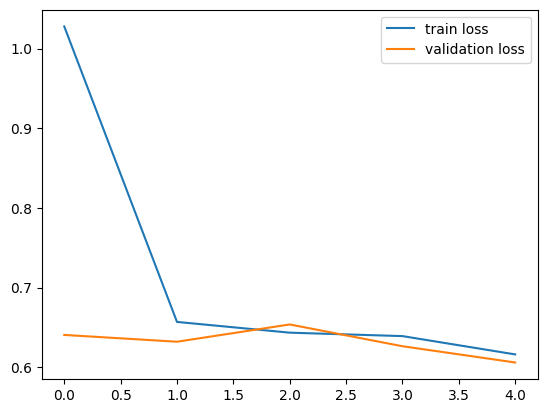

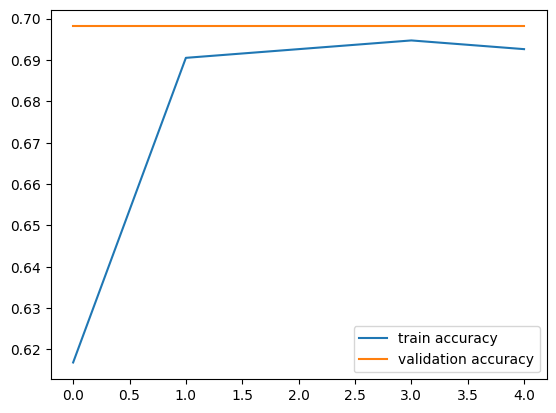

In [96]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

# PREDICTIVE SYSTEM

Path of the image to be predicted: /content/massk.jpg


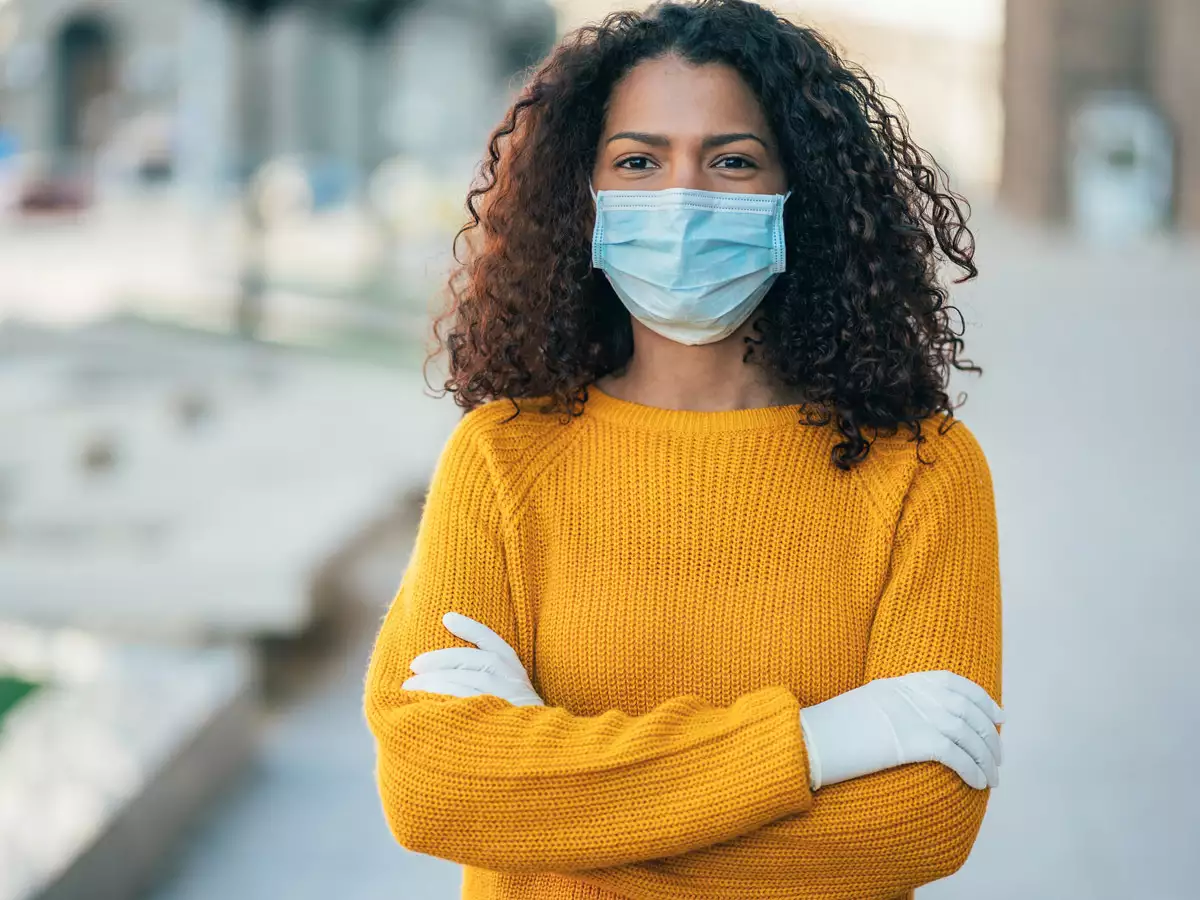

1/1 [==============================] - 0s 24ms/step
[[0.80507207 0.41638762]]
0
The person in the image is not wearing a mask


In [99]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/without.png


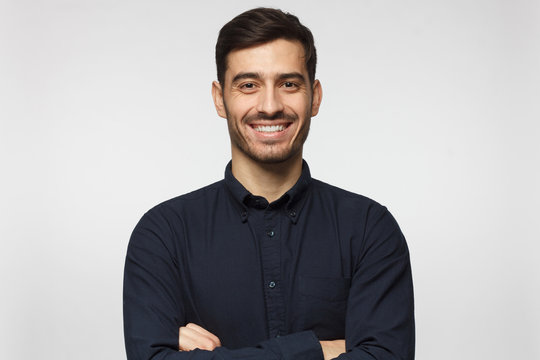

1/1 [==============================] - 0s 18ms/step
[[0.7404404 0.4477685]]
0
The person in the image is not wearing a mask


In [98]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')